# MLP and back-propagation
Code link:

## Abstract
Using python to build a simple multi-layer perception with two input one output and one hidden layer. Training with back-propagation to optimize cost function and approaching the target function. 

## Preparations
Using numpy for matrix operations and matplotlib for ploting figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The defination of our target function is simply given as :
\begin{equation}
y=a*x_1+b*x_2
\end{equation}
Input x is in 2-dimensional. Output is 1-dmensional. And we can set a=0.8, b=0.6. 

In [2]:
def targetfunc(x):
    y=x[:,0]*0.8+x[:,1]*0.6
    return y

## MLP
Building a MLP class which contains methods for calculating and training. 

### Structure
![MLP](./MLP.png)
As the figure shows, our MLP has two input unit, three hidden unit and one output unit. 


### Forward
To calculate the output, we define a forward function in MLP class. We are using sigmoid function for the activation. So the steps are:
$$
z^{(2)} = XW^{(1)}
$$
$$
a^{(2)} = f(z^{(2)}) 
$$
$$
z^{(3)} = a^{(2)}W^{(2)}
$$
$$
\hat{y} = f(z^{(3)})
$$
Which $W^{(1)}$ and $W^{(2)}$ are weights for every lines, $f$ is sigmoid function. 

### Back-propagation
#### Cost Function
The definition of cost function:
$$
E = \sum \frac{1}{2}(y-\hat{y})^2
$$

#### Gradient Descent
We use gradient to change weights of MLP:
$$
w + \Delta w
$$
$$
\Delta w = -\eta \frac{\partial E}{\partial W}
$$
$\eta$ is the learning rate.

Using the defination and chain rule we finally get:
$$
\frac{\partial E}{\partial W^{(2)}} = 
(a^{(2)})^T g^{(3)}
$$
$$
g^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$
$$
\frac{\partial E}{\partial W^{(1)}} = 
X^{T} g^{(2)} 
$$
$$
g^{(2)} = g^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Now we code this MLP class:

In [3]:
class Multi_Layer_Perception(object):
    def __init__(self):
        #Set parameters
        self.inputsize = 2
        self.hiddensize = 3
        self.outputsize = 1
        
        #initialize weights with random numbers
        self.w1 = np.random.randn(self.inputsize,self.hiddensize)
        self.w2 = np.random.randn(self.hiddensize,self.outputsize)
        
    def forward(self,X):
        self.z2 = np.dot(X,self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.w2)
        yout = self.sigmoid(self.z3)
        return yout
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def sigmoidd(self,z):
        #Derivative of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costfunction(self,X,y):
        self.yout = self.forward(X)
        E = 0.5*sum((y-self.yout)**2)
        return E
    
    def gradient(self,X,y):
        self.yout = self.forward(X)
        g3 = np.multiply(-(y-self.yout),self.sigmoidd(self.z3))
        dEdw2 = np.dot(self.a2.T,g3)
        g2 = np.dot(g3,self.w2.T)*self.sigmoidd(self.z2)
        dEdw1 = np.dot(X.T,g2)
        return dEdw1,dEdw2
    
    def train(self,X,y,lr):
        #training function with learning rate
        dw = self.gradient(X,y)
        self.w1 = self.w1 - lr * dw[0]
        self.w2 = self.w2 - lr * dw[1]

## Testing
### Initialization
Initialize some data with target function

In [4]:
X = np.random.rand(3,2)
y = targetfunc(X)

In [5]:
X

array([[0.91895182, 0.45124773],
       [0.89846816, 0.35530726],
       [0.09797456, 0.81538086]])

In [6]:
y

array([1.00591009, 0.93195888, 0.56760816])

Transpose target data y for the forward calculation:

In [7]:
y = y.reshape(y.shape[0],1)

Create a MLP object:

In [8]:
MLP = Multi_Layer_Perception()

Output and error before training:

In [9]:
yo = np.array([MLP.forward(X)])
E = np.array([MLP.costfunction(X,y)])

In [10]:
yo

array([[[0.38156663],
        [0.38675576],
        [0.22454242]]])

### Training
 Training n times with 0.3 learning rate, and see the change of costfunction with the training time. 

In [11]:
n = 500
for i in range(n-1):
    MLP.train(X,y,0.3)
    yi = np.array([MLP.forward(X)])
    Ei = np.array([MLP.costfunction(X,y)])
    yo = np.vstack((yo,yi))
    E = np.vstack((E,Ei))

In [12]:
t = np.arange(1,n+1)

Plot time-cost. We can see the back-propagation works. 

Text(0, 0.5, 'cost')

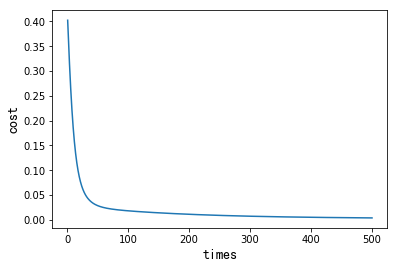

In [13]:
plt.plot(t,E)
plt.xlabel(u'times',fontproperties='SimHei',fontsize=14)
plt.ylabel(u'cost',fontproperties='SimHei',fontsize=14)